# A/B testing in Python

**Problem statement**  :- Suppose we conduct an A/B test for a new promotional banner on our site, aiming to evaluate its effectiveness before a full rollout to all users. The treatment group will view the new banner, while the control group will be shown either a placebo or another similar banner without the promotional content. To determine the banner's impact, we can measure its effect using several essential metrics.

In [15]:
import numpy as np
import pandas as pd

**General steps**:

1. Firstly , we construct the data for our A/B testing segment. We begin by setting a random seed to ensure data reproducibility.


2. Subsequently, we execute our statistical tests on the chosen metrics.



3. We then verify the accuracy of our statistical test. While real-world testing scenarios might be more complex and nuanced, it's beneficial to start with well-defined distributions. (Assumption)

In [18]:
#  Creation of A/B testing data


# setting random seed so that we get same result when we run the test multiple times 

np.random.seed(101)
num_users = 2000


In this initial section, we will establish user distributions for the treatment and control groups across various metrics. These metrics include time spent on the website, average revenue, purchase count, and click-through rate (CTR).

In [19]:
# Simulating A/B testing outcomes

# Exponential distribution for time on webpage
treated_timeonpage = np.random.exponential(scale=1/1.5, size=num_users)
control_timeonpage = np.random.exponential(scale=1/0.5, size=num_users)

In [21]:
# Normal distribution for average revenue
treated_averev = np.random.normal(loc=10, scale=5, size=num_users)
control_averev = np.random.normal(loc=15, scale=5, size=num_users)

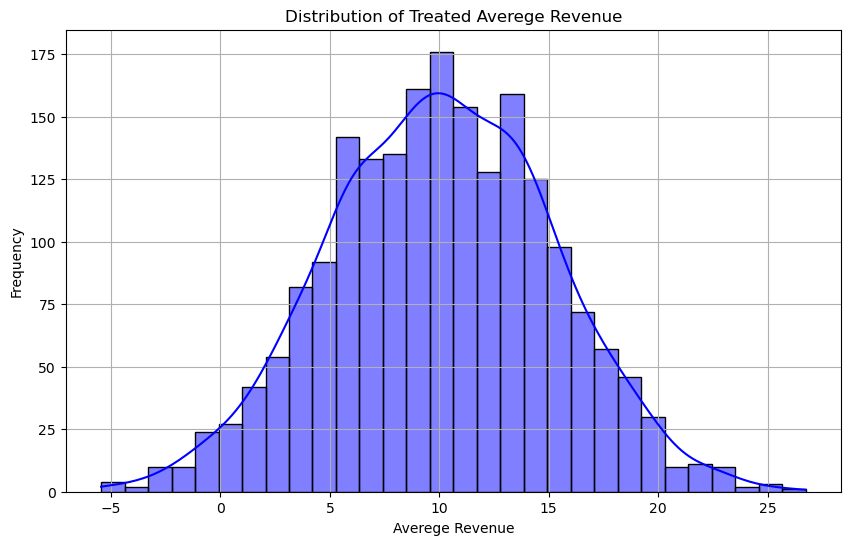

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(treated_averev, kde=True, color='blue', bins=30)
plt.xlabel('Averege Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Treated Averege Revenue')
plt.grid(True)
plt.show()


In [36]:
# Poisson distribution for number of purchases
treated_purchases = np.random.poisson(lam=2, size=num_users)
control_purchases = np.random.poisson(lam=2, size=num_users)

# Binomial distribution for CTR
treated_CTR = np.random.binomial(n=1, p=0.5, size=num_users)
control_CTR = np.random.binomial(n=1, p=0.57, size=num_users)

I've then organized the simulated data into two data frames: one for treatment and another for control. Subsequently,I'llinspect the initial five entries to ensure our data has been assembled accurately. 

In [44]:
# Creating the dataframes
# Treatment dataframe
user_treated = pd.DataFrame({
    'user_id': range(1, num_users + 1),
    'treated': 1,
    'time_in_product': treated_timeonpage,
    'purchases': treated_purchases,
    'rev_user': treated_averev,
    'CTR': treated_CTR,
    'region': np.random.choice(list('ABCD'), size=num_users),
    'gender': ['F', 'M'] * (num_users // 2)
})

# Control dataframe
user_control = pd.DataFrame({
    'user_id': range(1, num_users + 1),
    'treated': 0,
    'time_in_product': control_timeonpage,
    'purchases': control_purchases,
    'rev_user': control_averev,
    'CTR': control_CTR,
    'region': np.random.choice(list('ABCD'), size=num_users),
    'gender': ['F', 'M'] * (num_users // 2)
})


# combinig the dataset

full_data = pd.concat([user_treated, user_control], axis=0)



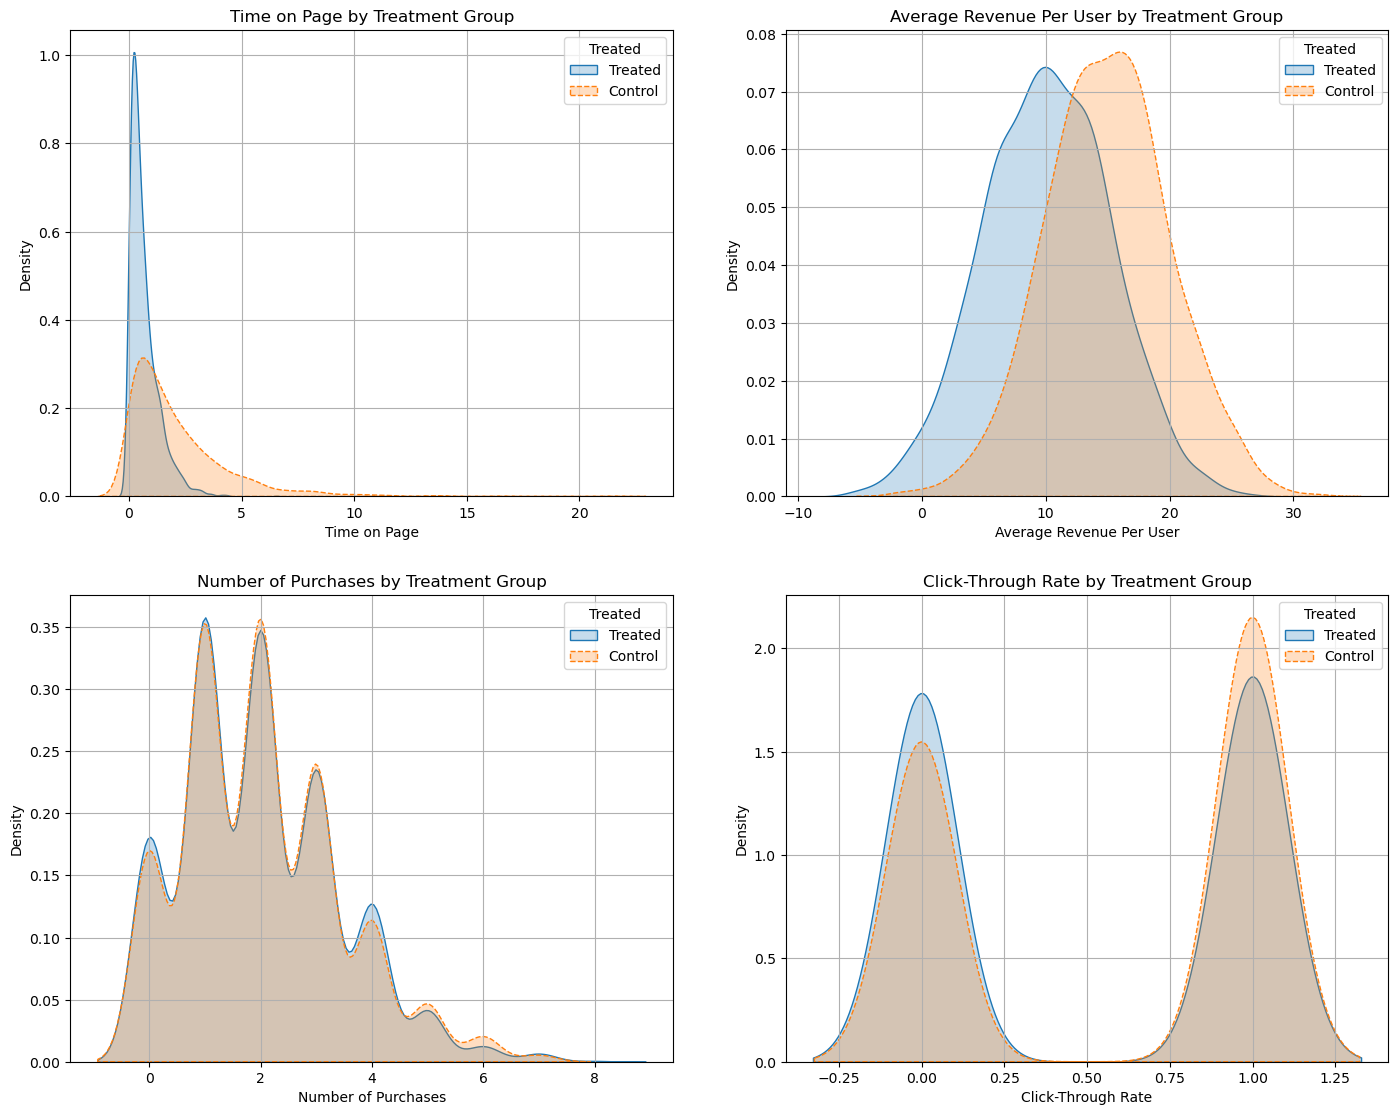

In [56]:
# Lets visualize the distribution of all metrics using a KDE plot 

# Setting up subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

# Function to plot KDE for treated and control groups in specified axes
def plot_kde(ax, treated_data, control_data, title, xlabel):
    sns.kdeplot(data=treated_data, ax=ax, label='Treated', shade=True, linestyle='-')
    sns.kdeplot(data=control_data, ax=ax, label='Control', shade=True, linestyle='--')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.legend(title='Treated')
    ax.grid(True)

# Plot for Time on Page
plot_kde(axes[0, 0], treated_timeonpage, control_timeonpage, "Time on Page by Treatment Group", "Time on Page")

# Plot for Average Revenue
plot_kde(axes[0, 1], treated_averev, control_averev, "Average Revenue Per User by Treatment Group", "Average Revenue Per User")

# Plot for Purchases
plot_kde(axes[1, 0], treated_purchases, control_purchases, "Number of Purchases by Treatment Group", "Number of Purchases")

# Plot for CTR
plot_kde(axes[1, 1], treated_CTR, control_CTR, "Click-Through Rate by Treatment Group", "Click-Through Rate")

plt.show()

In [45]:
user_treated

,user_id,treated,time_in_product,purchases,rev_user,CTR,region,gender
0,1,1,0.484330,3,5.618052,0,A,F
1,2,1,0.563683,2,5.040735,0,A,M
2,3,1,0.019258,0,8.928863,0,A,F
3,4,1,0.125443,3,8.715803,0,B,M
4,5,1,0.770708,2,14.437059,0,D,F
...,...,...,...,...,...,...,...,...
1995,1996,1,0.167684,0,17.663409,1,C,M
1996,1997,1,0.084475,0,8.298695,1,A,F
1997,1998,1,0.006030,4,15.937085,1,A,M
1998,1999,1,0.765187,3,16.554322,1,D,F


# 1. Average Revenue

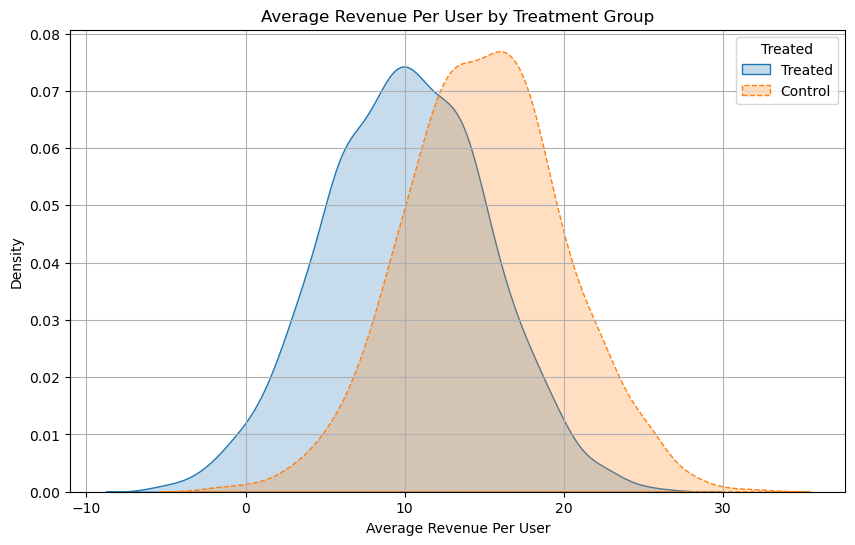

In [46]:
# The next step is to run some statistical tests. The first metric that we will consider is average revenue

plt.figure(figsize=(10, 6))

# Plotting the density plot for treated and control groups
sns.kdeplot(data=full_data[full_data['treated'] == 1]['rev_user'], label='Treated', shade=True, linestyle='-')
sns.kdeplot(data=full_data[full_data['treated'] == 0]['rev_user'], label='Control', shade=True, linestyle='--')

# Adding titles and labels
plt.title('Average Revenue Per User by Treatment Group')
plt.xlabel('Average Revenue Per User')
plt.ylabel('Density')
plt.legend(title='Treated')
plt.grid(True)
plt.show()


Now, we run Welch’s t-test . A t test is a statistical test that is used to compare the means of two groups


**Null hypothesis for Welch’s t-test** : ARPU is the same for both the treatment and control groups.
. If the test results in rejecting this null hypothesis, it means there's a statistically significant difference in the ARPUs of the treatment and control groups.

In [48]:
import scipy.stats as stats

# Running Welch's t-test
t_stat, p_value = stats.ttest_ind(user_treated['rev_user'], user_control['rev_user'], equal_var=False)

# Getting the means of the two groups
mean_treated = user_treated['rev_user'].mean()
mean_control = user_control['rev_user'].mean()

# Calculating the 95% confidence interval for the difference in means
conf_int = stats.t.interval(0.95,                                # Confidence level
                            df=min(len(user_treated['rev_user'])-1, len(user_control['rev_user'])-1), # Degrees of freedom
                            loc=mean_treated - mean_control,     # Difference in means
                            scale=stats.sem(user_treated['rev_user'] - user_control['rev_user']))

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"Mean of Treated Group: {mean_treated}")
print(f"Mean of Control Group: {mean_control}")
print(f"95% Confidence Interval for Difference in Means: {conf_int}")


t-statistic: -31.054756835403385
p-value: 7.235323383723167e-190
Mean of Treated Group: 10.065184193009506
Mean of Control Group: 15.021845713070192
95% Confidence Interval for Difference in Means: (-5.267402288567503, -4.64592075155387)


# Interpretation


1. **t-statistic**: If this value is far from 0 (either positive or negative), it indicates that the means of the two groups are different.  In our case , the value is far from zero meaning the new promotional banner is statistically significant.


2. **p-value**: A small p-value (typically < 0.05) suggests that you can reject the null hypothesis . Meaning we can reject the null hypothesis .


3. **95% Confidence Interval**: This interval gives you a range within which the true difference in means likely falls. If this interval doesn't contain 0, it's another indication that there's a significant difference in the means.



But testing just one metric isn't always the best idea. We would want to test out many metrics to ensure the efficacy of a feature change. 
So let's check the CTR metric now .


# CTR (Click Thru Rate )

In [49]:
treated_CTR

array([0, 0, 0, ..., 1, 1, 1])

Now I aim to investigate the influence of the promotional banner on users' Click-Through Rate (CTR) leading to purchases.

**Null Hypothesis** : The starting assumption is that both the treatment and control groups have equivalent CTRs. 
As a first step, let's visualize both distributions, depicted in the below bar graph

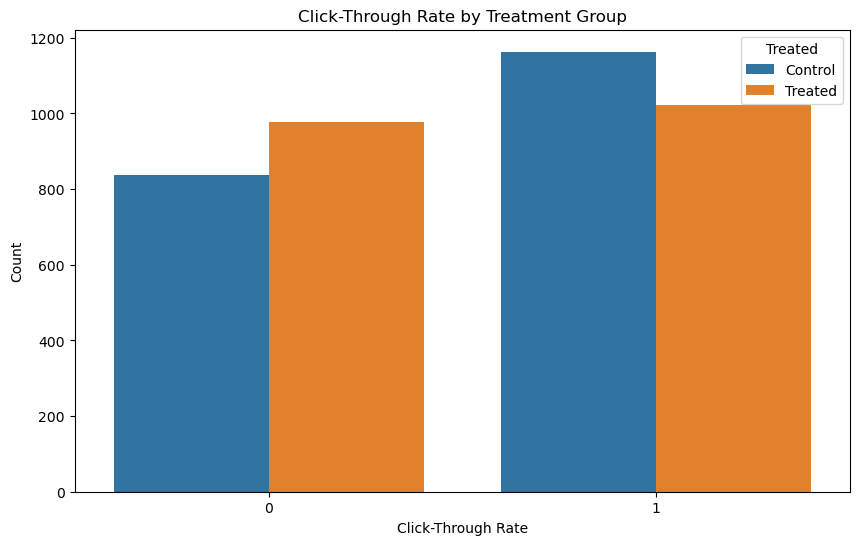

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar plot for treated and control groups
plt.figure(figsize=(10, 6))
sns.countplot(data=full_data, x='CTR', hue='treated')

# Adding titles and labels
plt.title('Click-Through Rate by Treatment Group')
plt.xlabel('Click-Through Rate')
plt.ylabel('Count')
plt.legend(title='Treated', labels=['Control', 'Treated'])
plt.show()


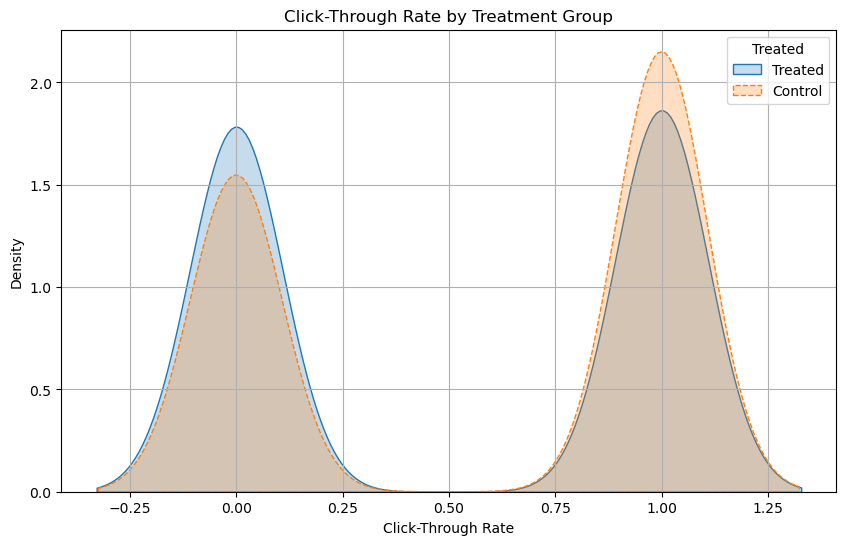

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plotting the density plot for treated and control groups
sns.kdeplot(data=full_data[full_data['treated'] == 1]['CTR'], label='Treated', shade=True, linestyle='-')
sns.kdeplot(data=full_data[full_data['treated'] == 0]['CTR'], label='Control', shade=True, linestyle='--')

# Adding titles and labels
plt.title('Click-Through Rate by Treatment Group')
plt.xlabel('Click-Through Rate')
plt.ylabel('Density')
plt.legend(title='Treated')
plt.grid(True)
plt.show()


In [53]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(full_data['CTR'], full_data['treated'])

# Run the chi-squared test
chi2, p, _, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print("\nExpected Counts:")
print(expected)
print("\nObserved Counts:")
print(contingency_table.values)


Chi-squared: 19.769149787872486
p-value: 8.73817606083469e-06

Expected Counts:
[[ 907.5  907.5]
 [1092.5 1092.5]]

Observed Counts:
[[ 837  978]
 [1163 1022]]


# Interpretation



Test Statistic:

Our  calculated Chi-squared (Test statistic / X^2) value is 19.769. The larger the value,  greater the evidence against the null hypothesis. The null hypothesis for the Chi-squared test of independence is that the two categorical variables are independent (i.e., no association between them). In simpler terms, the high value of 19.769 suggests that there's a statistically significant relationship between the promotional banner (treatment) and the Click-Through Rate (CTR). The presence or absence of the promotional banner affects whether users click or not.


p-value:  
The p-value is 8.738e-06 (or 0.000008738), which is significantly smaller than the common significance level of 0.05. The low p-value (< 0.05) indicates that you can reject the null hypothesis

The observed and expected count are as follows:

Expected Counts:

Control, No Click: 907.5
Control, Click: 907.5
Treated, No Click: 1092.5
Treated, Click: 1092.5

Observed Counts:
In our sample, the observed counts were:
Control, No Click: 837
Control, Click: 978
Treated, No Click: 1163
Treated, Click: 1022


This suggests that the promotional banner (treatment) might be leading to fewer clicks as compared to not having the promotional banner (control). This insight could be valuable for decision-making regarding the banner's deployment.